###Resolución


### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
#Comenzaremos analizar los ingresos totales por tienda

Ingresos_totales_tienda1 = sum(tienda["Precio"])
Ingresos_totales_tienda2 = sum(tienda2["Precio"])
Ingresos_totales_tienda3 = sum(tienda3["Precio"])
Ingresos_totales_tienda4 = sum(tienda4["Precio"])

print(f"El total de ingresos de la tienda 1 fue de ${Ingresos_totales_tienda1:,.0f}")
print(f"El total de ingresos de la tienda 2 fue de ${Ingresos_totales_tienda2:,.0f}")
print(f"El total de ingresos de la tienda 3 fue de ${Ingresos_totales_tienda3:,.0f}")
print(f"El total de ingresos de la tienda 4 fue de ${Ingresos_totales_tienda4:,.0f}")


El total de ingresos de la tienda 1 fue de $1,150,880,400
El total de ingresos de la tienda 2 fue de $1,116,343,500
El total de ingresos de la tienda 3 fue de $1,098,019,600
El total de ingresos de la tienda 4 fue de $1,038,375,700


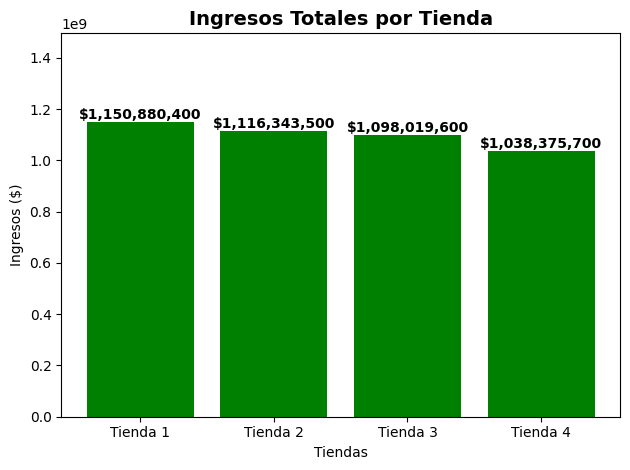

In [40]:
import matplotlib.pyplot as plt

#RPara verlos visualmente:

ingresos = [
    sum(tienda["Precio"]),
    sum(tienda2["Precio"]),
    sum(tienda3["Precio"]),
    sum(tienda4["Precio"])]

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
barras = plt.bar(tiendas,ingresos, color="green")
plt.title("Ingresos Totales por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos ($)")
plt.ylim(0, max(ingresos) * 1.3)

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 100, f"${altura:,.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [45]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Lista para guardar resultados
resultados = []

for nombre, df in tiendas.items():
    ventas_por_categoria = df.groupby("Categoría del Producto")["Producto"].count()

    # Más vendida
    cat_mas = ventas_por_categoria.idxmax()
    cant_mas = ventas_por_categoria.max()

    # Menos vendida
    cat_menos = ventas_por_categoria.idxmin()
    cant_menos = ventas_por_categoria.min()

    resultados.append({
        "Tienda": nombre,
        "Categoría más vendida": cat_mas,
        "Ventas (máx)": cant_mas,
        "Categoría menos vendida": cat_menos,
        "Ventas (mín)": cant_menos
    })

# Convertimos a DataFrame para mostrar todo junto
tabla_resumen = pd.DataFrame(resultados)
print(tabla_resumen.to_string(index=False))

  Tienda Categoría más vendida  Ventas (máx) Categoría menos vendida  Ventas (mín)
Tienda 1               Muebles           465 Artículos para el hogar           171
Tienda 2               Muebles           442 Artículos para el hogar           181
Tienda 3               Muebles           499 Artículos para el hogar           177
Tienda 4               Muebles           480  Instrumentos musicales           170


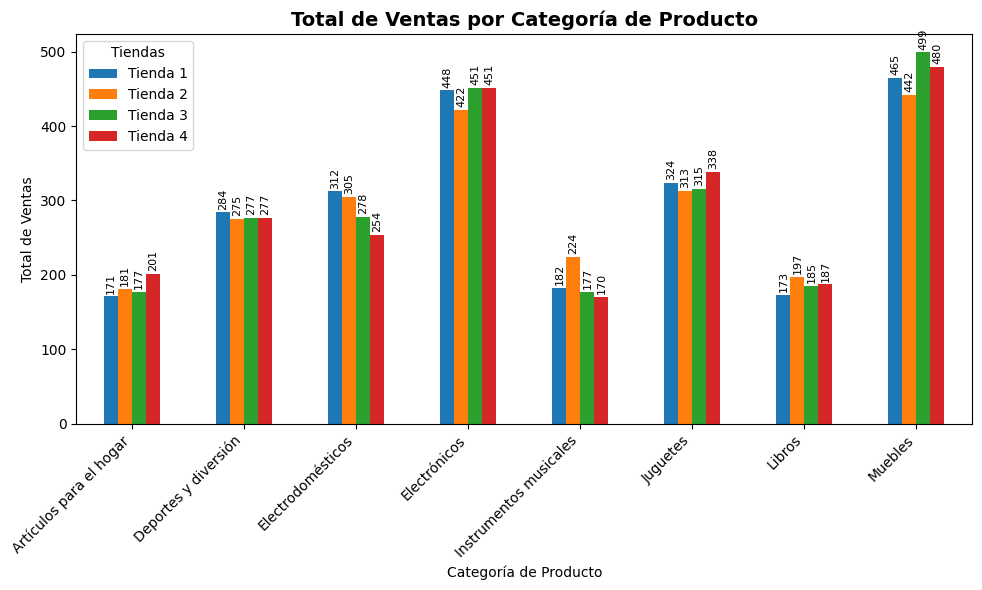

In [49]:
ventas_t1 = tienda.groupby("Categoría del Producto")["Producto"].count().rename("Tienda 1")
ventas_t2 = tienda2.groupby("Categoría del Producto")["Producto"].count().rename("Tienda 2")
ventas_t3 = tienda3.groupby("Categoría del Producto")["Producto"].count().rename("Tienda 3")
ventas_t4 = tienda4.groupby("Categoría del Producto")["Producto"].count().rename("Tienda 4")

ventas_categorias = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], axis=1).fillna(0)

# --- Gráfico ---
ax = ventas_categorias.plot(kind="bar", figsize=(10,6))

plt.title("Total de Ventas por Categoría de Producto", fontsize=14, fontweight="bold")
plt.xlabel("Categoría de Producto")
plt.ylabel("Total de Ventas")
plt.legend(title="Tiendas")
plt.xticks(rotation=45, ha="right")

# --- Agregar etiquetas encima de cada barra ---
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=8, rotation=90, padding=2)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [50]:
promedioTienda1 = tienda["Calificación"].mean()
promedioTienda2 = tienda2["Calificación"].mean()
promedioTienda3 = tienda3["Calificación"].mean()
promedioTienda4 = tienda4["Calificación"].mean()

print(f"La satisfacion promedio de los cliente en la tienda 1 es: {promedioTienda1:.2f}")
print(f"La satisfacion promedio de los cliente en la tienda 2 es: {promedioTienda2:.2f}")
print(f"La satisfacion promedio de los cliente en la tienda 3 es: {promedioTienda3:.2f}")
print(f"La satisfacion promedio de los cliente en la tienda 4 es: {promedioTienda4:.2f}")


La satisfacion promedio de los cliente en la tienda 1 es: 3.98
La satisfacion promedio de los cliente en la tienda 2 es: 4.04
La satisfacion promedio de los cliente en la tienda 3 es: 4.05
La satisfacion promedio de los cliente en la tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [56]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    # Conteo por producto
    counts = df.groupby("Producto").size().sort_values(ascending=False)

    max_n = counts.max()
    min_n = counts.min()

    top = counts[counts == max_n]
    low = counts[counts == min_n]

    print(f"\n=== {nombre} ===")
    print(f"Productos más vendidos ({max_n} ventas):")
    for producto in top.index:
        print(f"  - {producto}")

    print(f"Productos menos vendidos ({min_n} ventas):")
    for producto in low.index:
       print(f"  - {producto}")


=== Tienda 1 ===
Productos más vendidos (60 ventas):
  - Armario
  - TV LED UHD 4K
  - Microondas
Productos menos vendidos (33 ventas):
  - Celular ABXY
  - Auriculares con micrófono

=== Tienda 2 ===
Productos más vendidos (65 ventas):
  - Iniciando en programación
Productos menos vendidos (32 ventas):
  - Juego de mesa

=== Tienda 3 ===
Productos más vendidos (57 ventas):
  - Kit de bancas
Productos menos vendidos (35 ventas):
  - Bloques de construcción

=== Tienda 4 ===
Productos más vendidos (62 ventas):
  - Cama box
Productos menos vendidos (33 ventas):
  - Guitarra eléctrica


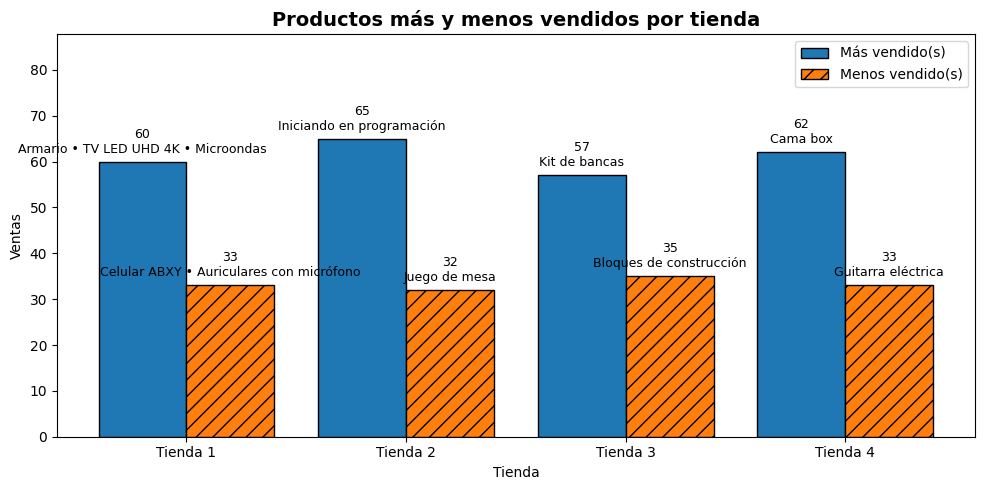

In [60]:
import textwrap
resumen = []  # una fila por tienda con max/min y listas de productos

for nombre, df in tiendas.items():
    counts = df.groupby("Producto").size().sort_values(ascending=False)
    if counts.empty:
        resumen.append({
            "Tienda": nombre, "max_n": 0, "min_n": 0,
            "top_prods": [], "low_prods": []
        })
        continue

    max_n = counts.max()
    min_n = counts.min()
    top = counts[counts == max_n].index.tolist()
    low = counts[counts == min_n].index.tolist()

    resumen.append({
        "Tienda": nombre,
        "max_n": int(max_n),
        "min_n": int(min_n),
        "top_prods": top,
        "low_prods": low
    })
tienda_labels = [r["Tienda"] for r in resumen]
vals_max = [r["max_n"] for r in resumen]
vals_min = [r["min_n"] for r in resumen]

x = range(len(tienda_labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 5))
b1 = ax.bar([i - width/2 for i in x], vals_max, width, label="Más vendido(s)", edgecolor="black")
b2 = ax.bar([i + width/2 for i in x], vals_min, width, label="Menos vendido(s)", edgecolor="black", hatch="//")

ax.set_title("Productos más y menos vendidos por tienda", fontsize=14, fontweight="bold")
ax.set_xlabel("Tienda")
ax.set_ylabel("Ventas")
ax.set_xticks(list(x), tienda_labels)
ax.legend()

# --- Etiquetas de valor + nombres de productos (acortados) ---
def short_list(nombres, max_chars=28, max_items=3):
    if not nombres:
        return ""
    items = [n if len(n) <= max_chars else n[:max_chars-1] + "…" for n in nombres[:max_items]]
    extra = len(nombres) - len(items)
    return " • ".join(items) + (f" (+{extra})" if extra > 0 else "")

ymax = max([*vals_max, *vals_min, 1])
for rect, r in zip(b1, resumen):
    x0 = rect.get_x() + rect.get_width()/2
    y0 = rect.get_height()
    ax.text(x0, y0 + ymax*0.02,
            f"{r['max_n']}\n{short_list(r['top_prods'])}",
            ha="center", va="bottom", fontsize=9)

for rect, r in zip(b2, resumen):
    x0 = rect.get_x() + rect.get_width()/2
    y0 = rect.get_height()
    ax.text(x0, y0 + ymax*0.02,
            f"{r['min_n']}\n{short_list(r['low_prods'])}",
            ha="center", va="bottom", fontsize=9)

ax.set_ylim(0, ymax * 1.35)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [27]:

costoEnvioPromedioTienda1 = tienda["Costo de envío"].mean()
costoEnvioPromedioTienda2 = tienda2["Costo de envío"].mean()
costoEnvioPromedioTienda3 = tienda3["Costo de envío"].mean()
costoEnvioPromedioTienda4 = tienda4["Costo de envío"].mean()

print(f"Costo de envio promedio tienda 1: ${costoEnvioPromedioTienda1:.2f}")
print(f"Costo de envio promedio tienda 2: ${costoEnvioPromedioTienda2:.2f}")
print(f"Costo de envio promedio tienda 3: ${costoEnvioPromedioTienda3:.2f}")
print(f"Costo de envio promedio tienda 4: ${costoEnvioPromedioTienda4:.2f}")

Costo de envio promedio tienda 1: $26018.61
Costo de envio promedio tienda 2: $25216.24
Costo de envio promedio tienda 3: $24805.68
Costo de envio promedio tienda 4: $23459.46


Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


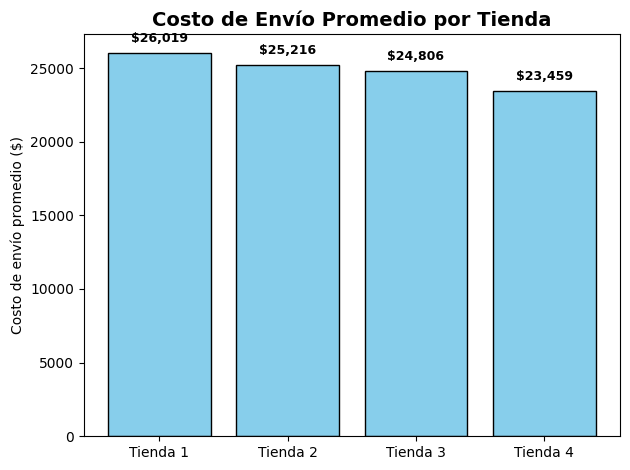

In [64]:

nombres = []
costos_promedio = []

for nombre, df in tiendas.items():
    promedio = df["Costo de envío"].mean()
    print(f"Costo de envío promedio {nombre}: ${promedio:.2f}")

    nombres.append(nombre)
    costos_promedio.append(promedio)

# --- Gráfico de barras ---
plt.bar(nombres, costos_promedio, color="skyblue", edgecolor="black")
plt.title("Costo de Envío Promedio por Tienda", fontsize=14, fontweight="bold")
plt.ylabel("Costo de envío promedio ($)")

# Etiquetas arriba de cada barra
for i, v in enumerate(costos_promedio):
    plt.text(i, v + (max(costos_promedio) * 0.02), f"${v:,.0f}",
             ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()

# 6. Informe Final

El presente informe detalle el analisis de datos de las Tienda 1, Tienda 2, Tienda 3 y Tienda 4, pertenecientes a la Cadena de Tienda de Don Juan. El objetivo del presente es determinar cual de las tiendas se recomienda vender, basados en el analisis de los datos y los gráficos generados.

###****Resumen Ejecutivo****

*   Tienda 1: Mayor volumen de ingresos (≈ 1.15×10
9
 ). Amplio mix con top de alto ticket (TV UHD 4K, Microondas).
*   Tienda 2: Ingresos muy cercanos (≈ 1.12×10
9
 ). Producto estrella claro (“Iniciando en programación”), lo que sugiere concentración.

*   Tienda 3: Ingresos algo menores (≈ 1.10×10
9
 ). Top de ticket medio (“kit de bancas”); base más homogénea, pero menor tracción.
*   Tienda 4: La menor en ingresos (≈ 1.04×10
9
 ), con top de alto ticket (“Cama box”).


###****Lectura por Dimensión****

1. Escala del Negoci

*    Orden: T1 > T2 > T3 > T4.
*   Implicación: T1 ofrece el mayor “techo” de crecimiento por tamaño actual.

2. Concentración de la demanda (riesgo)

* T2 muestra un líder muy marcado (“Iniciando en programación”). Si ese producto cae, la tienda lo siente más.

* T1 reparte mejor entre varios top (Armario, TV 4K, Microondas) → menor riesgo de concentración.

* T3 y T4 tienen top de ticket medio/alto, pero con colas de productos menos vendidos (bloques de construcción, guitarra eléctrica) que pueden inmovilizar capital.

3. Atractivo por categoría (comparativo)

* En el gráfico de barras agrupadas por categoría, Electrónicos y Electrodomésticos explican una fracción relevante en T1 y T2 (categorías de alta rotación y valor).

* T3/T4 compiten más fuerte en muebles/otros, con rotaciones más dispares.

4. Eficiencia operacional (costo de envío promedio)

* T4 tiene los costos mas bajo en promdio de envío.

###****Conclusión y Recomendación****
Recomendación principal (corto plazo):

####invertir en Tienda 1.
Por qué:

* Mayor escala de ingresos hoy (tracción demostrada).

* Menor concentración en un único producto (riesgo mitigado).

* Fuerte presencia en categorías de alta rotación/valor (Electrónicos/Electrodomésticos).


####Segunda opción (mediano plazo): Tienda 2
* Ingresos casi al nivel de T1; si su costo de envío es menor, el unit economics puede ser superior.

* Riesgo: concentración en un producto. Mitigar con diversificación de top sellers (cross-selling desde el curso a hardware/ebooks/accesorios).


